# Explore overfitting and underfitting

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


## Download the IMDB dataset

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

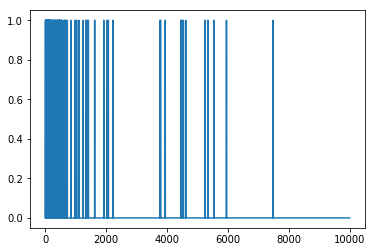

In [3]:
plt.plot(train_data[0])

## Demonstrate overfitting

### Create a baseline model

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5058 - acc: 0.7839 - binary_crossentropy: 0.5058 - val_loss: 0.3513 - val_acc: 0.8754 - val_binary_crossentropy: 0.3513
Epoch 2/20
 - 2s - loss: 0.2572 - acc: 0.9101 - binary_crossentropy: 0.2572 - val_loss: 0.2855 - val_acc: 0.8872 - val_binary_crossentropy: 0.2855
Epoch 3/20
 - 2s - loss: 0.1840 - acc: 0.9358 - binary_crossentropy: 0.1840 - val_loss: 0.2884 - val_acc: 0.8857 - val_binary_crossentropy: 0.2884
Epoch 4/20
 - 2s - loss: 0.1442 - acc: 0.9512 - binary_crossentropy: 0.1442 - val_loss: 0.3139 - val_acc: 0.8797 - val_binary_crossentropy: 0.3139
Epoch 5/20
 - 2s - loss: 0.1164 - acc: 0.9628 - binary_crossentropy: 0.1164 - val_loss: 0.3412 - val_acc: 0.8747 - val_binary_crossentropy: 0.3412
Epoch 6/20
 - 2s - loss: 0.0929 - acc: 0.9729 - binary_crossentropy: 0.0929 - val_loss: 0.3738 - val_acc: 0.8710 - val_binary_crossentropy: 0.3738
Epoch 7/20
 - 3s - loss: 0.0741 - acc: 0.9806 - binary_crossentropy:

### Create a smaller model

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6384 - acc: 0.6754 - binary_crossentropy: 0.6384 - val_loss: 0.5776 - val_acc: 0.7916 - val_binary_crossentropy: 0.5776
Epoch 2/20
 - 3s - loss: 0.4961 - acc: 0.8526 - binary_crossentropy: 0.4961 - val_loss: 0.4480 - val_acc: 0.8578 - val_binary_crossentropy: 0.4480
Epoch 3/20
 - 3s - loss: 0.3578 - acc: 0.9004 - binary_crossentropy: 0.3578 - val_loss: 0.3488 - val_acc: 0.8805 - val_binary_crossentropy: 0.3488
Epoch 4/20
 - 3s - loss: 0.2668 - acc: 0.9211 - binary_crossentropy: 0.2668 - val_loss: 0.3056 - val_acc: 0.8875 - val_binary_crossentropy: 0.3056
Epoch 5/20
 - 3s - loss: 0.2178 - acc: 0.9324 - binary_crossentropy: 0.2178 - val_loss: 0.2905 - val_acc: 0.8873 - val_binary_crossentropy: 0.2905
Epoch 6/20
 - 3s - loss: 0.1870 - acc: 0.9404 - binary_crossentropy: 0.1870 - val_loss: 0.2853 - val_acc: 0.8886 - val_binary_crossentropy: 0.2853
Epoch 7/20
 - 3s - loss: 0.1651 - acc: 0.9489 - binary_crossentropy:

### Create a bigger model

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.3503 - acc: 0.8500 - binary_crossentropy: 0.3503 - val_loss: 0.2926 - val_acc: 0.8822 - val_binary_crossentropy: 0.2926
Epoch 2/20
 - 5s - loss: 0.1389 - acc: 0.9496 - binary_crossentropy: 0.1389 - val_loss: 0.3541 - val_acc: 0.8644 - val_binary_crossentropy: 0.3541
Epoch 3/20
 - 5s - loss: 0.0461 - acc: 0.9871 - binary_crossentropy: 0.0461 - val_loss: 0.4351 - val_acc: 0.8687 - val_binary_crossentropy: 0.4351
Epoch 4/20
 - 5s - loss: 0.0075 - acc: 0.9988 - binary_crossentropy: 0.0075 - val_loss: 0.5798 - val_acc: 0.8686 - val_binary_crossentropy: 0.5798
Epoch 5/20
 - 5s - loss: 9.7760e-04 - acc: 1.0000 - binary_crossentropy: 9.7760e-04 - val_loss: 0.6759 - val_acc: 0.8698 - val_binary_crossentropy: 0.6759
Epoch 6/20
 - 5s - loss: 2.4172e-04 - acc: 1.0000 - binary_crossentropy: 2.4172e-04 - val_loss: 0.7154 - val_acc: 0.8702 - val_binary_crossentropy: 0.7154
Epoch 7/20
 - 5s - loss: 1.4695e-04 - acc: 1.0000 - 

### Plot the training and validation loss

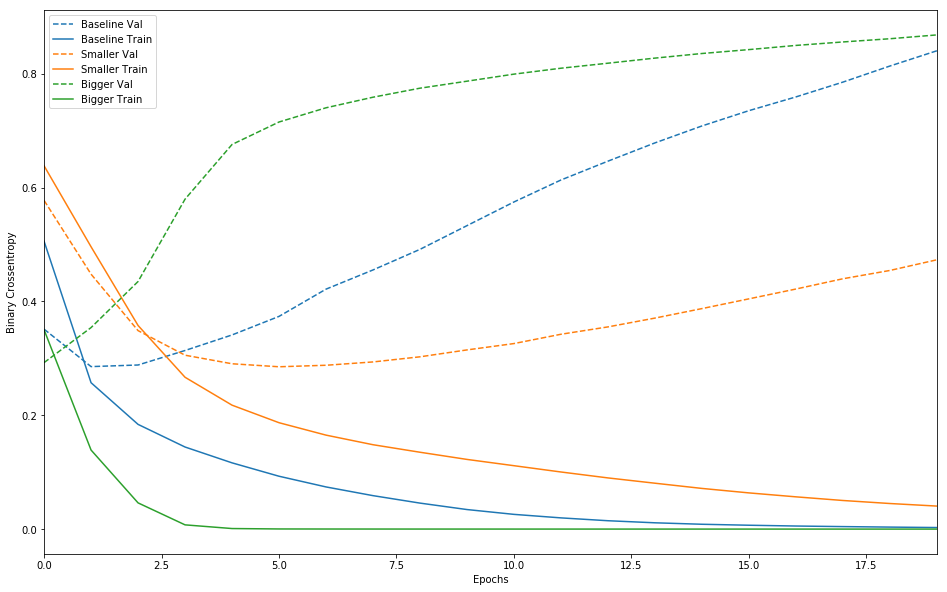

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])


## Strategies

### Add weight regularization

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5249 - acc: 0.8056 - binary_crossentropy: 0.4841 - val_loss: 0.3822 - val_acc: 0.8768 - val_binary_crossentropy: 0.3392
Epoch 2/20
 - 2s - loss: 0.3087 - acc: 0.9072 - binary_crossentropy: 0.2617 - val_loss: 0.3360 - val_acc: 0.8871 - val_binary_crossentropy: 0.2860
Epoch 3/20
 - 3s - loss: 0.2590 - acc: 0.9271 - binary_crossentropy: 0.2067 - val_loss: 0.3366 - val_acc: 0.8859 - val_binary_crossentropy: 0.2826
Epoch 4/20
 - 3s - loss: 0.2344 - acc: 0.9386 - binary_crossentropy: 0.1790 - val_loss: 0.3459 - val_acc: 0.8836 - val_binary_crossentropy: 0.2895
Epoch 5/20
 - 3s - loss: 0.2211 - acc: 0.9446 - binary_crossentropy: 0.1632 - val_loss: 0.3587 - val_acc: 0.8803 - val_binary_crossentropy: 0.2999
Epoch 6/20
 - 3s - loss: 0.2084 - acc: 0.9497 - binary_crossentropy: 0.1490 - val_loss: 0.3713 - val_acc: 0.8770 - val_binary_crossentropy: 0.3116
Epoch 7/20
 - 3s - loss: 0.2016 - acc: 0.9525 - binary_crossentropy:

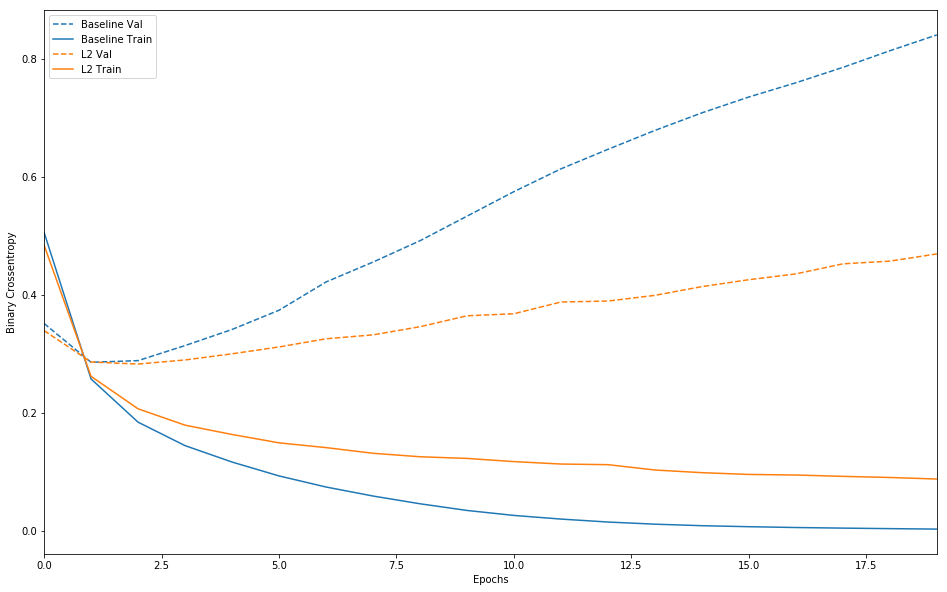

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### Add dropout

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6199 - acc: 0.6495 - binary_crossentropy: 0.6199 - val_loss: 0.4673 - val_acc: 0.8527 - val_binary_crossentropy: 0.4673
Epoch 2/20
 - 3s - loss: 0.4462 - acc: 0.8142 - binary_crossentropy: 0.4462 - val_loss: 0.3380 - val_acc: 0.8815 - val_binary_crossentropy: 0.3380
Epoch 3/20
 - 3s - loss: 0.3471 - acc: 0.8692 - binary_crossentropy: 0.3471 - val_loss: 0.2868 - val_acc: 0.8872 - val_binary_crossentropy: 0.2868
Epoch 4/20
 - 3s - loss: 0.2899 - acc: 0.8938 - binary_crossentropy: 0.2899 - val_loss: 0.2747 - val_acc: 0.8876 - val_binary_crossentropy: 0.2747
Epoch 5/20
 - 3s - loss: 0.2469 - acc: 0.9102 - binary_crossentropy: 0.2469 - val_loss: 0.2806 - val_acc: 0.8881 - val_binary_crossentropy: 0.2806
Epoch 6/20
 - 3s - loss: 0.2143 - acc: 0.9260 - binary_crossentropy: 0.2143 - val_loss: 0.2910 - val_acc: 0.8859 - val_binary_crossentropy: 0.2910
Epoch 7/20
 - 3s - loss: 0.1932 - acc: 0.9312 - binary_crossentropy:

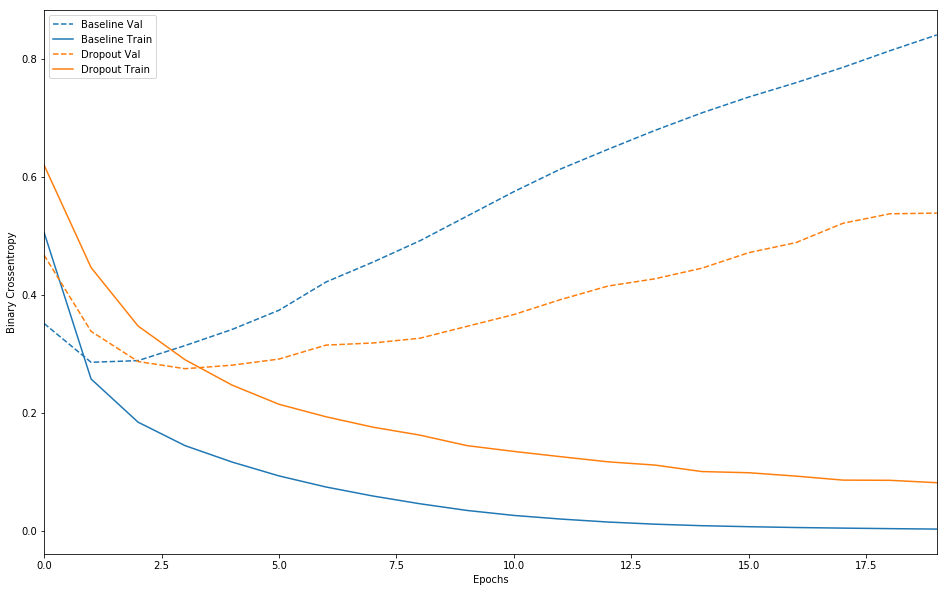

In [18]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])